# An Example of Regression using the Boston Dataset. 
# How can predict real estate price?

In [1]:
# load libs
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
import warnings; warnings.filterwarnings("ignore") 
import os; os.environ['OMP_NUM_THREADS'] = '8' 

In [2]:
# load boston dataset in a dataframe
boston = load_boston()
print(boston.DESCR)
data = pd.DataFrame(boston.data,columns=boston.feature_names)
data = pd.concat([data,pd.Series(boston.target,name='MEDV')],axis=1)
data.head(5)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


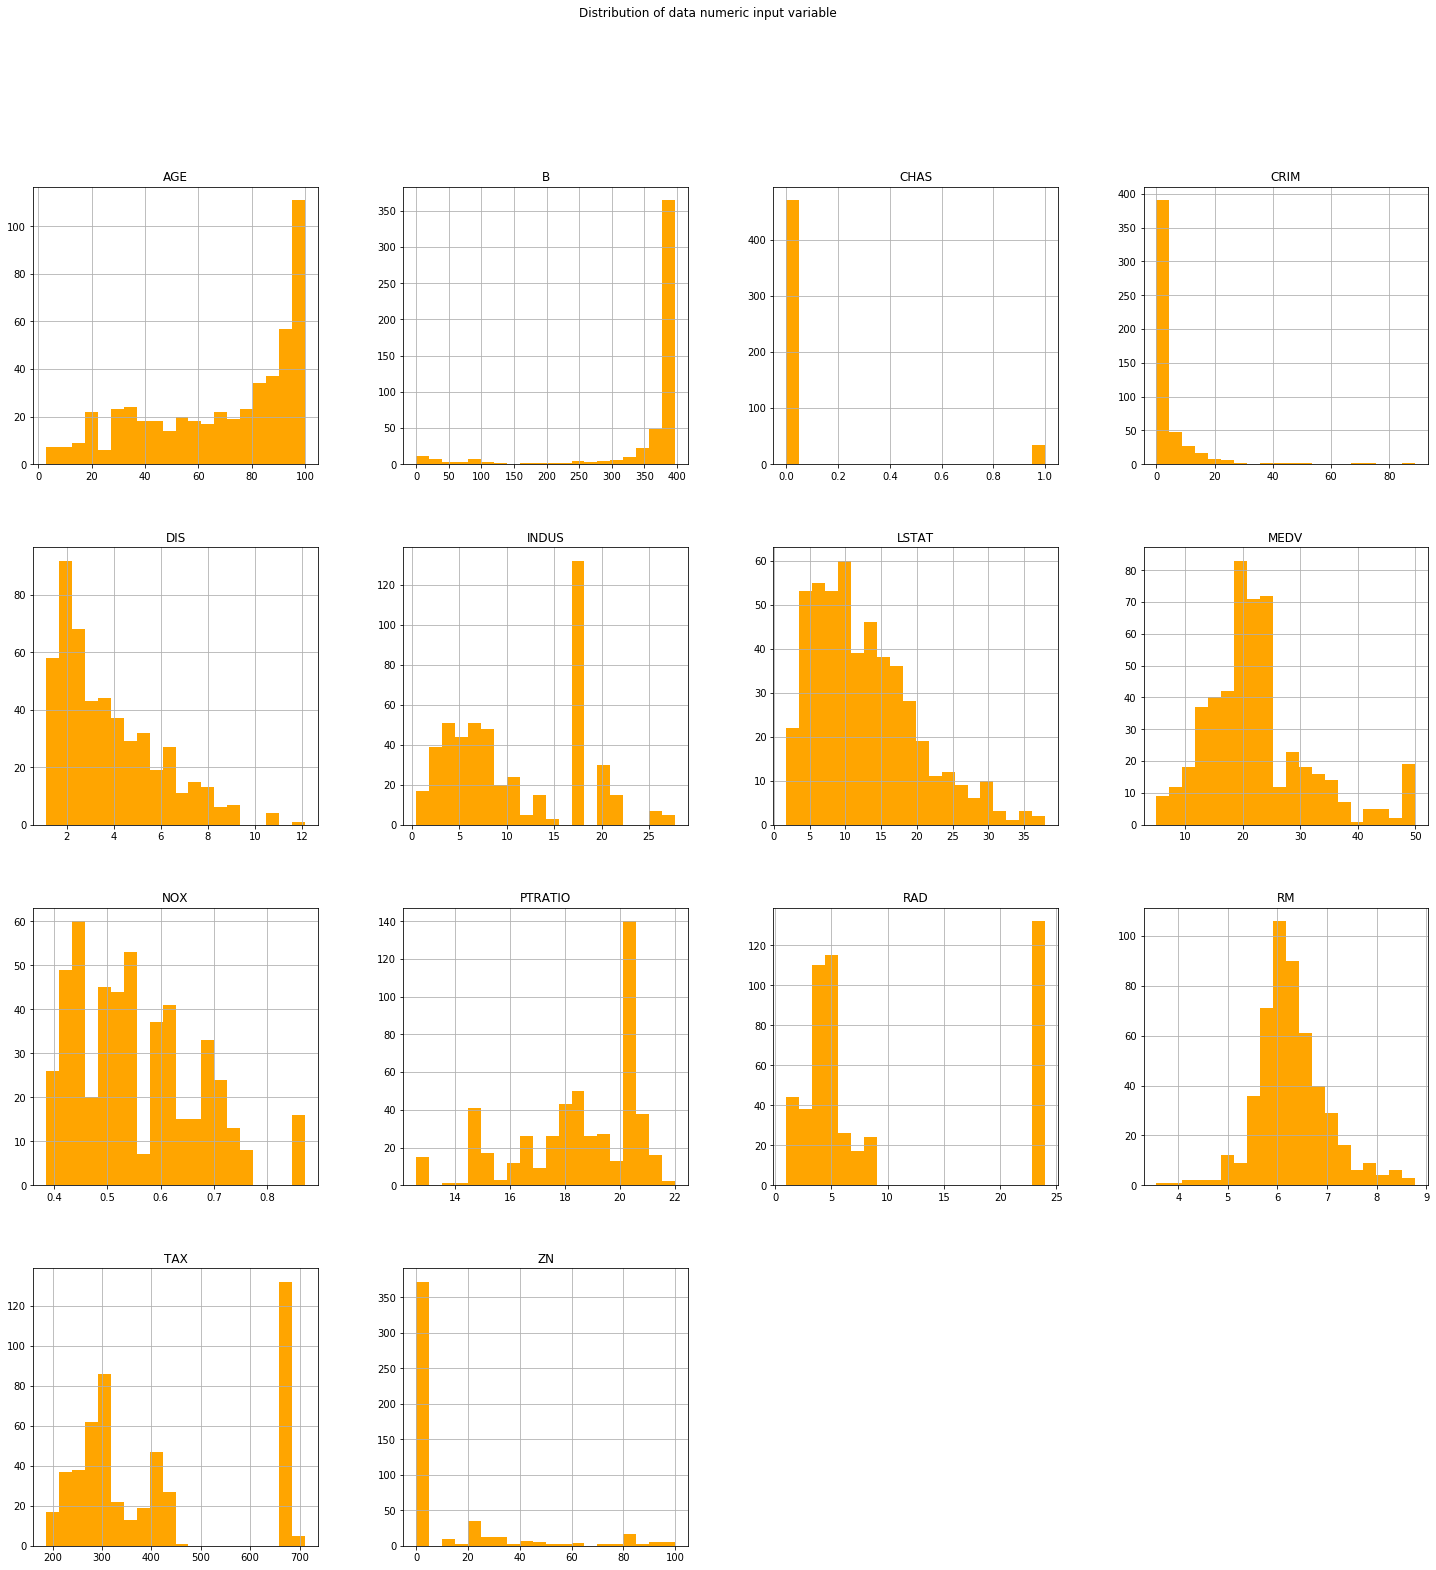

In [3]:
# let's look at the distribution of our data
data.hist(bins=20, figsize=(25,25), color = 'orange')
plt.suptitle("Distribution of data numeric input variable")
plt.show()

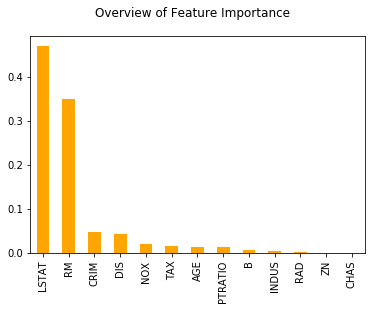

Accuracy of RF Regressor on training set: 0.98


In [4]:
# use random forest for feature importance evaluation
X = data[data.columns[:-1]]
y = data[data.columns[-1]]
rfr = RandomForestRegressor()
rfr.fit(X, y)
features = pd.Series(rfr.feature_importances_, index= data.columns[:-1])
features.nlargest(20).plot(kind = 'bar', color = 'orange')
plt.suptitle("Overview of Feature Importance")
plt.show()

# RF model evaluation
print('Accuracy of RF Regressor on training set: {:.2f}'.format(rfr.score(X, y)))

In [5]:
# Let's split our dataset in train & test parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

### Accuracy is not the prefered metric for a regression...
### Our metric for this regression will be RMSE :

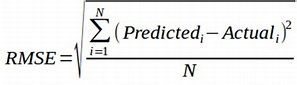

### Let's try 3 models to identify the best one... 

In [6]:
ridge=Ridge()
ridge.fit(X_train, y_train)
y_train_predict = ridge.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
print('Ridge RMSE is {}'.format(rmse),'on train dataset')
y_test_predict = ridge.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
print('Ridge RMSE is {}'.format(rmse),'on test dataset')

Ridge RMSE is 4.671629083261626 on train dataset
Ridge RMSE is 4.947442897872463 on test dataset


In [7]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_predict = lr.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
print('LR RMSE is {}'.format(rmse),'on train dataset')
y_test_predict = lr.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
print('LR RMSE is {}'.format(rmse),'on test dataset')

LR RMSE is 4.6520331848801675 on train dataset
LR RMSE is 4.928602182665355 on test dataset


In [8]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_train_predict = rfr.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
print('RF RMSE is {}'.format(rmse),'on train dataset')
y_test_predict = rfr.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
print('RF RMSE is {}'.format(rmse),'on test dataset')

RF RMSE is 1.895706783213267 on train dataset
RF RMSE is 3.9789084866453064 on test dataset


### Without parameter tunning, Random Forest regressor seems better...
### How can we confirm this intuition?


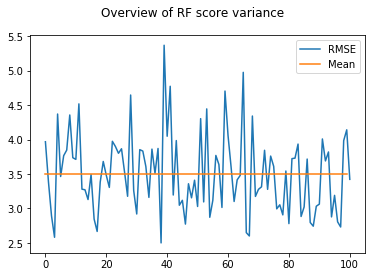

Average RSME of our random forest regressor is : 3.5021


In [9]:
# let's look at model stability with others data splits... 
scores = []
for i in range (0,101,1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = i)
    rfr = RandomForestRegressor()
    rfr.fit(X_train, y_train)
    y_test_predict = rfr.predict(X_test)
    rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
    scores.append(rmse)
mean = [sum(scores) / len(scores)] * 100
fig,ax = plt.subplots()
data_line = ax.plot(scores, label='RMSE')
mean_line = ax.plot(mean, label='Mean', linestyle='-')
legend = ax.legend(loc='upper right')
plt.suptitle("Overview of RF score variance")
plt.show()
print('Average RSME of our random forest regressor is : {:.4f}'.format(sum(scores) / len(scores)))